Exploratory Data Analysis With Python

A Case Study of Transavvy Auto-mobile Inc



An auto-mobile sales company, Transavvy, is experiencing rapid growth and needs to leverage its data to make informed business decisions. As a data scientist, you are tasked with analyzing their sales data to provide actionable insights. This project will require you to work with the company’s historical data, including product prices, customer orders, inventory, and other factors to optimize sales, understand customer preferences, and improve overall business operations.


In [1]:
## Step1 : Import all the necessary EDA libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  #(visualization library (Static))
import seaborn as sns            # visualizationlibrary (dynamic)

from warnings import filterwarnings
filterwarnings('ignore')



Step 2: Import all necessary EDA libraries

In [3]:
df = pd.read_csv('/content/Autosave csv.csv')

In [4]:
## Display top 5 rows of table

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34.0,81.35,5.0,2765.90,7/5/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41.0,94.74,2.0,3884.34,1/7/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45.0,NaN,6.0,NaN,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36.0,96.66,1.0,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
# The shape of the data: Total number of rows and columns

df.shape

(2747, 20)

In [6]:
# Check for data types and data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2731 non-null   float64
 2   PRICEEACH             2744 non-null   float64
 3   ORDERLINENUMBER       2740 non-null   float64
 4   SALES                 2744 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2742 non-null   object 
 8   PRODUCTLINE           2736 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
# Summary statistics for numerical variables(columns)

df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2731.000000,2744.000000,2740.000000,2744.000000,2747.000000,2747.000000
mean,10259.761558,35.086781,101.052496,6.489051,3550.807562,1757.085912,100.691664
std,91.877521,9.696010,42.017627,4.230950,1836.763731,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.710000,3.000000,2204.100000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3183.655000,1761.000000,99.000000
75%,10334.500000,43.000000,126.972500,9.000000,4500.642500,2436.500000,124.000000
max,10425.000000,85.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [8]:
# Bottom 5 rows of our data

df.tail(15)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2732,10232,24.0,49.69,3.0,1192.56,20/03/2019,3171,Shipped,Ships,54,S72_3212,giftsbymail.co.uk,(198) 555-8888,Garden House Crowther Way,Cowes,PO31 7PJ,UK,Bennett,Helen,Small
2733,10248,23.0,65.52,9.0,1506.96,7/5/2019,3124,Cancelled,Ships,54,S72_3212,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
2734,10261,29.0,50.78,7.0,1472.62,17/06/2019,3084,Shipped,Ships,54,S72_3212,Quebec Home Shopping Network,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,Fresnisre,Jean,Small
2735,10273,37.0,45.86,10.0,1696.82,21/07/2019,3051,Shipped,Ships,54,S72_3212,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,B-1180,Belgium,Dewey,Catherine,Small
2736,10283,33.0,51.32,12.0,1693.56,20/08/2019,3022,Shipped,Ships,54,S72_3212,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,Lincoln,Elizabeth,Small
2737,10293,32.0,60.06,1.0,1921.92,9/9/2019,3003,Shipped,Ships,54,S72_3212,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,10100,Italy,Accorti,Paolo,Small
2738,10306,35.0,59.51,6.0,2082.85,14/10/2019,2969,Shipped,Ships,54,S72_3212,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small
2739,10315,40.0,55.69,5.0,2227.60,29/10/2019,2955,Shipped,Ships,54,S72_3212,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
2740,10327,37.0,86.74,4.0,3209.38,10/11/2019,2944,Resolved,Ships,54,S72_3212,Danish Wholesale Imports,31 12 3555,Vinb'ltet 34,Kobenhavn,1734,Denmark,Petersen,Jytte,Medium
2741,10337,42.0,97.16,5.0,4080.72,21/11/2019,2934,Shipped,Ships,54,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,10022,USA,Hernandez,Maria,Medium


In [9]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2731.000000,2744.000000,2740.000000,2744.000000,2747.000000,2747.000000
mean,10259.761558,35.086781,101.052496,6.489051,3550.807562,1757.085912,100.691664
std,91.877521,9.696010,42.017627,4.230950,1836.763731,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.710000,3.000000,2204.100000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3183.655000,1761.000000,99.000000
75%,10334.500000,43.000000,126.972500,9.000000,4500.642500,2436.500000,124.000000
max,10425.000000,85.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [10]:
df.describe(include='all')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2747.000000,2731.000000,2744.000000,2740.000000,2744.000000,2747,2747.000000,2742,2736,2747.000000,2747,2747,2747,2747,2747,2747,2747,2747,2747,2734
unique,NaN,NaN,NaN,NaN,NaN,246,NaN,6,7,NaN,109,89,88,89,71,73,19,76,72,3
top,NaN,NaN,NaN,NaN,NaN,14/11/2018,NaN,Shipped,Classic Cars,NaN,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,NaN,2539,946,NaN,51,259,259,259,304,259,928,259,259,1341
mean,10259.761558,35.086781,101.052496,6.489051,3550.807562,NaN,1757.085912,NaN,NaN,100.691664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,91.877521,9.696010,42.017627,4.230950,1836.763731,NaN,819.280576,NaN,NaN,40.114802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,42.000000,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10181.000000,27.000000,68.710000,3.000000,2204.100000,NaN,1077.000000,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10264.000000,35.000000,95.550000,6.000000,3183.655000,NaN,1761.000000,NaN,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10334.500000,43.000000,126.972500,9.000000,4500.642500,NaN,2436.500000,NaN,NaN,124.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Run a check for missing values
# null(), isna()

df.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,16
PRICEEACH,3
ORDERLINENUMBER,7
SALES,3
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,5
PRODUCTLINE,11
MSRP,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,float64
PRICEEACH,float64
ORDERLINENUMBER,float64
SALES,float64
ORDERDATE,object
DAYS_SINCE_LASTORDER,int64
STATUS,object
PRODUCTLINE,object
MSRP,int64


In [14]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

Step 4 : Data Cleaning

In [15]:
# 1. Drop unnecessary columns

df = df.drop(['POSTALCODE','CONTACTFIRSTNAME','PHONE','ADDRESSLINE1'],axis=1)

In [16]:
df.shape

(2747, 16)

In [17]:
# 2.Convert orderdate from object to datetime

df['ORDERDATE'].head()





,ORDERDATE
0,24/02/2018
1,7/5/2018
2,1/7/2018
3,25/08/2018
4,28/10/2018


In [18]:
df[['QUANTITYORDERED','DEALSIZE','SALES']].head()

,QUANTITYORDERED,DEALSIZE,SALES
0,30.0,Small,2871.00
1,34.0,Small,2765.90
2,41.0,Medium,3884.34
3,45.0,Medium,NaN
4,36.0,Medium,3479.76


In [19]:
# Use to_datetime to convert the ordertime column

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2731 non-null   float64       
 2   PRICEEACH             2744 non-null   float64       
 3   ORDERLINENUMBER       2740 non-null   float64       
 4   SALES                 2744 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2742 non-null   object        
 8   PRODUCTLINE           2736 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  CITY                  2747 non-null   object        
 13  COUNTRY           

In [21]:
ds = {
    'name' : 'Ade',
    'class': 'SS2',
    'Dept' : 'science',
    'age'  : '14',
}

In [22]:
ds

{'name': 'Ade', 'class': 'SS2', 'Dept': 'science', 'age': '14'}

In [23]:
ds['age']

'14'

In [24]:
# Fill up missing values

# Find the mean of numerical variables

qo_mean = df['QUANTITYORDERED'].mean()

print(qo_mean)

35.086781398755036


In [25]:
# Fill QUANTITYORDERED columns with the calculated mean qo_mean

df['QUANTITYORDERED'] = df['QUANTITYORDERED'].fillna(qo_mean)




In [26]:
df['QUANTITYORDERED'].isna().sum()

np.int64(0)

In [27]:
pl_mode = df['PRODUCTLINE'].mode()[0]

In [28]:
print(pl_mode)

Classic Cars


In [29]:
list_one = ['ship','car', 'bike','bicycle']

In [30]:
list_one[0]

'ship'

In [31]:
# Fill productline column with the mode(pl_mode)

df['PRODUCTLINE'] = df['PRODUCTLINE'].fillna(pl_mode)

In [32]:
ds_mode = df['DEALSIZE'].mode()[0]

print(ds_mode)

Medium


In [33]:
df['DEALSIZE'] = df['DEALSIZE'].fillna(ds_mode)

In [34]:
# Drop the missing values with less numbers

df = df.dropna()

In [35]:
df.shape

(2732, 16)

In [36]:
# Extract day, year, and month from the orderdate

df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month_name()
df['DAY']  = df['ORDERDATE'].dt.day_name()

In [37]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,DEALSIZE,YEAR,MONTH,DAY
0,10107,30.0,95.70,2.0,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Small,2018,February,Saturday
1,10121,34.0,81.35,5.0,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Small,2018,May,Monday
2,10134,41.0,94.74,2.0,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Medium,2018,July,Sunday
4,10168,36.0,96.66,1.0,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Hirano,Medium,2018,October,Sunday
5,10180,29.0,86.13,9.0,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,Lille,France,Rance,Small,2018,November,Sunday


Step 5 : Univariate Analysis

Analyzing just one variable or column within the dataset

For Univariate analysis;

-Histogram/histplot

-Countplot

-box plot

-violin plot

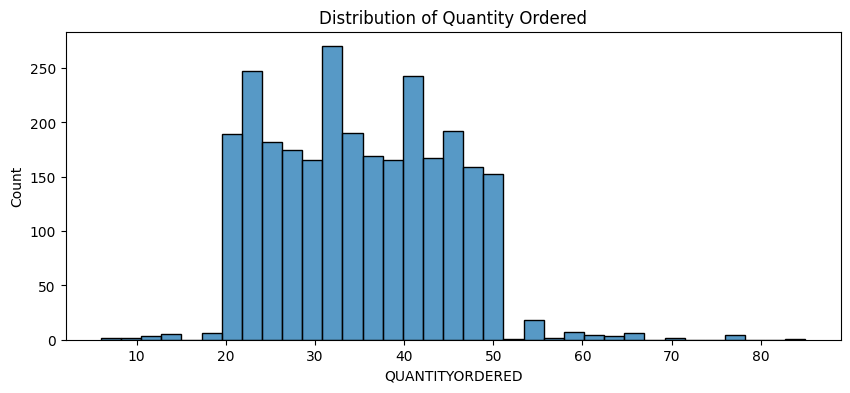

In [38]:
# 1. What is the distribution of quantity of cars ordered

plt.figure(figsize=(10,4))
sns.histplot(df['QUANTITYORDERED'])
plt.title('Distribution of Quantity Ordered')
plt.show()

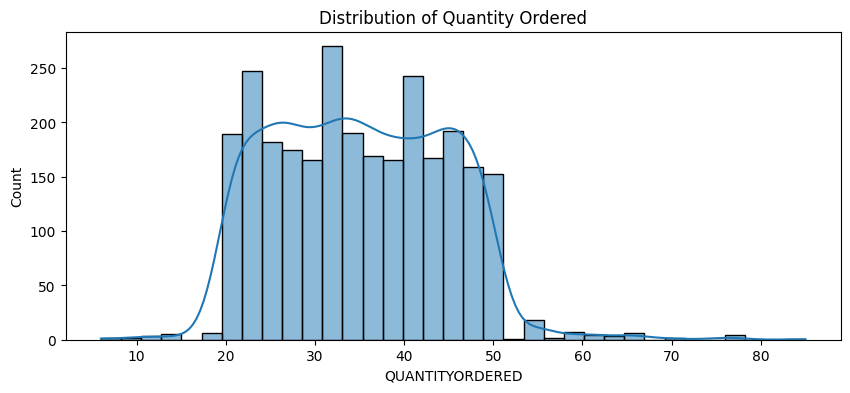

In [39]:
# b. What is the distribution of quantity of cars ordered

plt.figure(figsize=(10,4))
sns.histplot(df['QUANTITYORDERED'], kde=True)
plt.title('Distribution of Quantity Ordered')
plt.show()

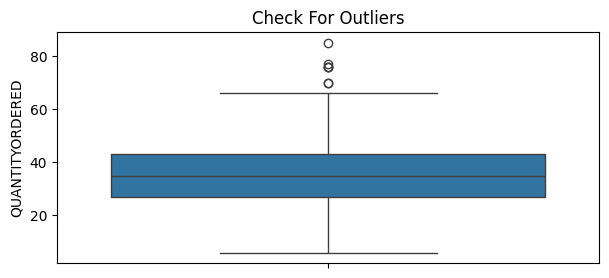

In [40]:
# Box plot to detect outliers

plt.figure(figsize =(7,3))
sns.boxplot(df['QUANTITYORDERED'])
plt.title('Check For Outliers')
plt.show()



In [41]:
# Total quantity ordered

qo_total = df['QUANTITYORDERED'].sum()

print(f'The total quantity ordered is: {qo_total:.2f}')

The total quantity ordered is: 95829.39


In [42]:
# 3. Which productline is the most popular

In [43]:
df['PRODUCTLINE'].nunique()

7

In [44]:
df['PRODUCTLINE'].value_counts()

,count
PRODUCTLINE,
Classic Cars,949
Vintage Cars,572
Motorcycles,311
Planes,303
Trucks and Buses,292
Ships,228
Trains,77


In [45]:
df['DEALSIZE'].value_counts()

,count
DEALSIZE,
Medium,1348
Small,1238
Large,146


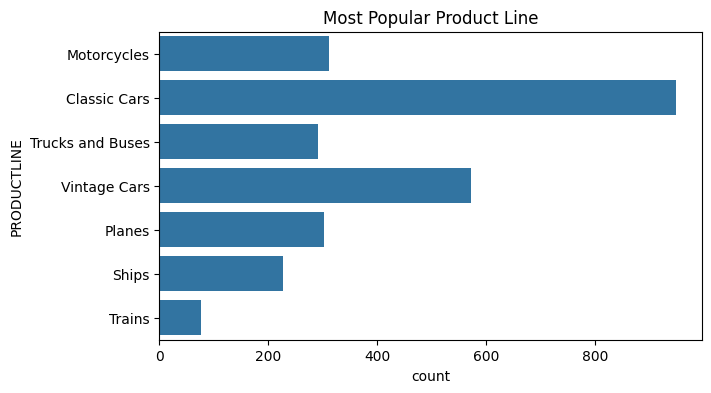

In [46]:
# Visualize productline using a count plot

plt.figure(figsize=(7,4))
sns.countplot(df['PRODUCTLINE'])
plt.title('Most Popular Product Line')
plt.show()

#

In [47]:
df['PRODUCTLINE'].value_counts()

,count
PRODUCTLINE,
Classic Cars,949
Vintage Cars,572
Motorcycles,311
Planes,303
Trucks and Buses,292
Ships,228
Trains,77


In [48]:
# Countplot To show distribtion of products in ascending or descending order

In [49]:
# Q3.What is the average price each Vs MSRP

avg_price = df['PRICEEACH'].mean()
avg_msrp = df['MSRP'].mean()

print(f'The average price of each product is: {avg_price:.2f} and MSRP is: {avg_msrp:.2f}')

The average price of each product is: 100.96 and MSRP is: 100.52


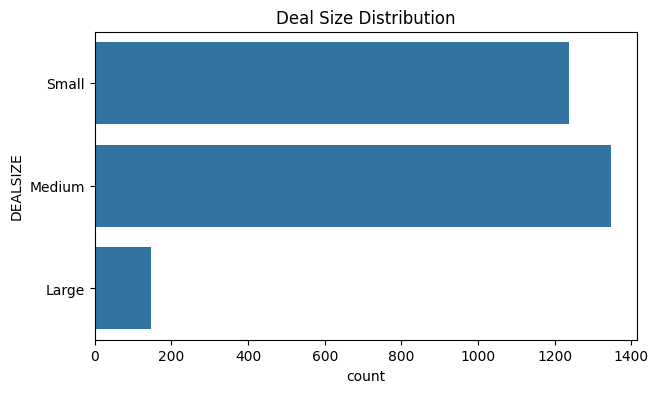

In [50]:
# Q4, Visualization for deal size

plt.figure(figsize =(7,4))
sns.countplot(df['DEALSIZE'])
plt.title('Deal Size Distribution')
plt.show()

In [51]:
# Q6.What is the breakdown of Order Status

df['STATUS'].value_counts()

,count
STATUS,
Shipped,2530
Cancelled,59
Resolved,47
On Hold,43
In Process,40
Disputed,13


In [52]:
# Find out the analysis based on shopping channels and geographic trends


In [53]:
### Bivariate analysis

# Analysing two columns simulteneously within the dataset

# Scatterplot

# Barplot



In [54]:
# Find revenue generated by Country

country_revenue = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

country_revenue

,SALES
COUNTRY,
USA,3339942.48
Spain,1199670.58
France,1097984.74
Australia,620074.68
UK,478880.46
Italy,374674.31
Finland,326293.09
Norway,307463.70
Singapore,288488.41


In [55]:
df['COUNTRY'].nunique()

19

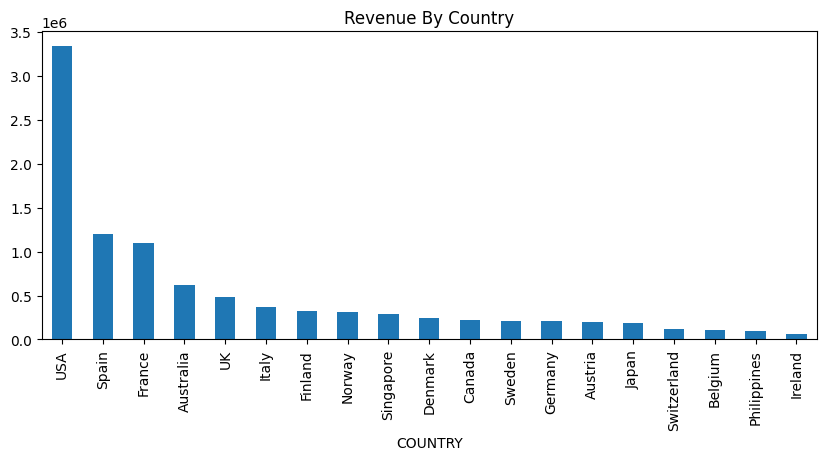

In [56]:
plt.figure(figsize =(10,4))
country_revenue.plot(kind ='bar', title= 'Revenue By Country')
plt.show()

In [57]:
# Top 5 Countries by Revenue

country_revenue_t5 = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head()

country_revenue_t5





,SALES
COUNTRY,
USA,3339942.48
Spain,1199670.58
France,1097984.74
Australia,620074.68
UK,478880.46


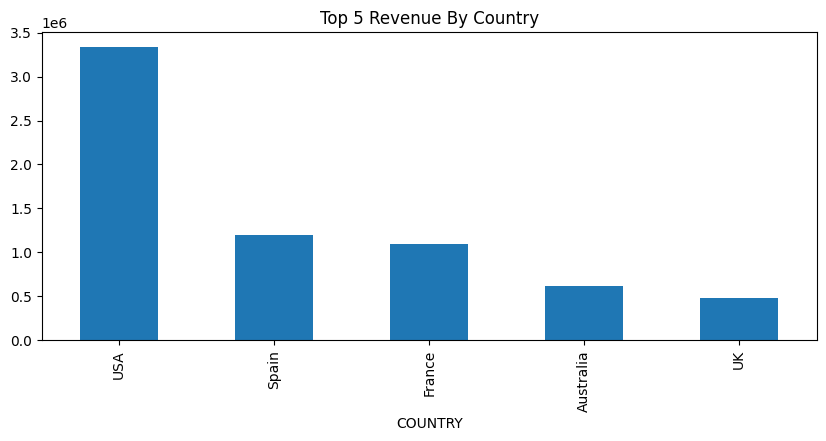

In [58]:
plt.figure(figsize =(10,4))
country_revenue_t5.plot(kind ='bar', title= 'Top 5 Revenue By Country')
plt.show()

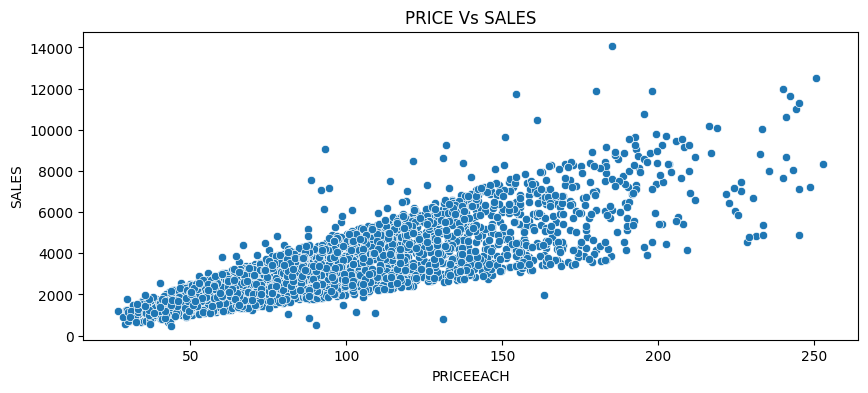

In [59]:
# Q8. Does price affect final sales

plt.figure(figsize =(10,4))
sns.scatterplot(x= 'PRICEEACH', y= 'SALES', data=df)
plt.title('PRICE Vs SALES')
plt.show()


In [60]:
# How does dealsize impact revenue

dsr = df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
print(dsr)



DEALSIZE
Medium    5924557.85
Small     2551673.06
Large     1212270.62
Name: SALES, dtype: float64


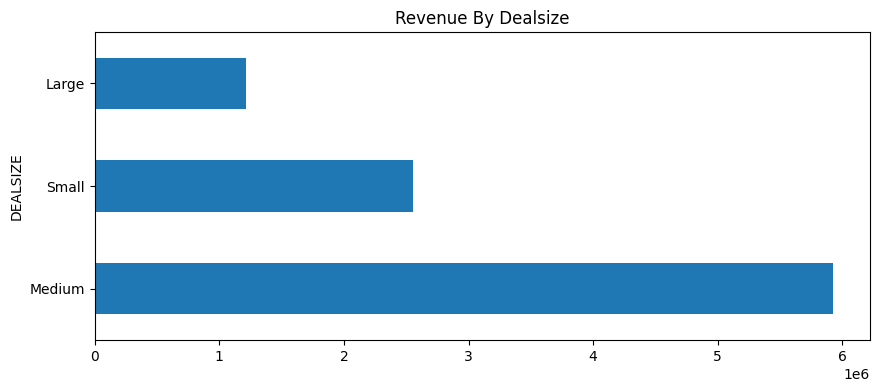

In [63]:
plt.figure(figsize=(10,4))
dsr.plot(kind='barh',title='Revenue By Dealsize')
plt.show()

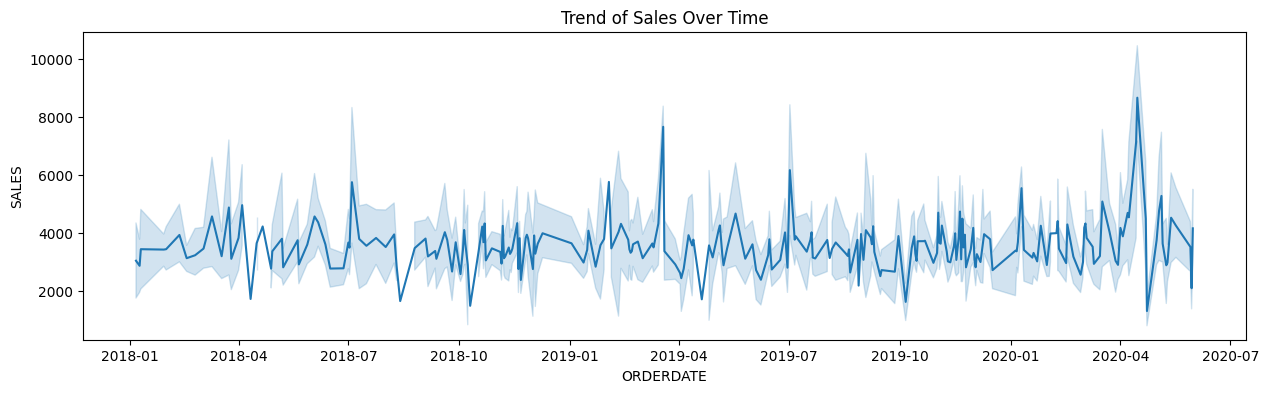

In [61]:
# Q10. Display a trend of revenue over time
plt.figure(figsize=(15,4))
sns.lineplot(data=df,x='ORDERDATE',y='SALES')
plt.title('Trend of Sales Over Time')
plt.show()

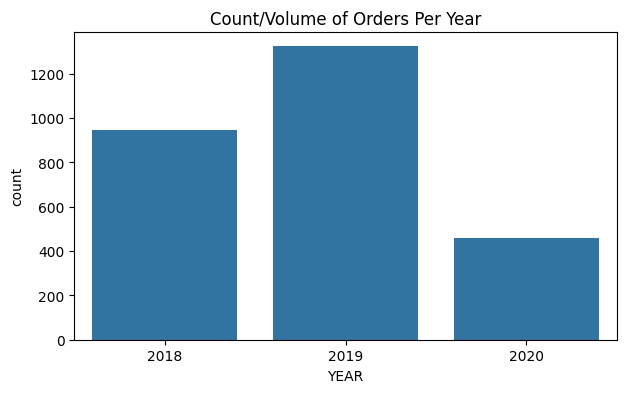

In [64]:
plt.figure(figsize=(7,4))
sns.countplot(x='YEAR', data=df)
plt.title('Count/Volume of Orders Per Year')
plt.show()



In [65]:
df['YEAR'].value_counts()

,count
YEAR,
2019,1324
2018,948
2020,460


Multivariate analysis

Multivariate analysis - Analyzing three or more columns/variables simultenously

Use

-Component bar charts

-Heatmap

-Pairplot

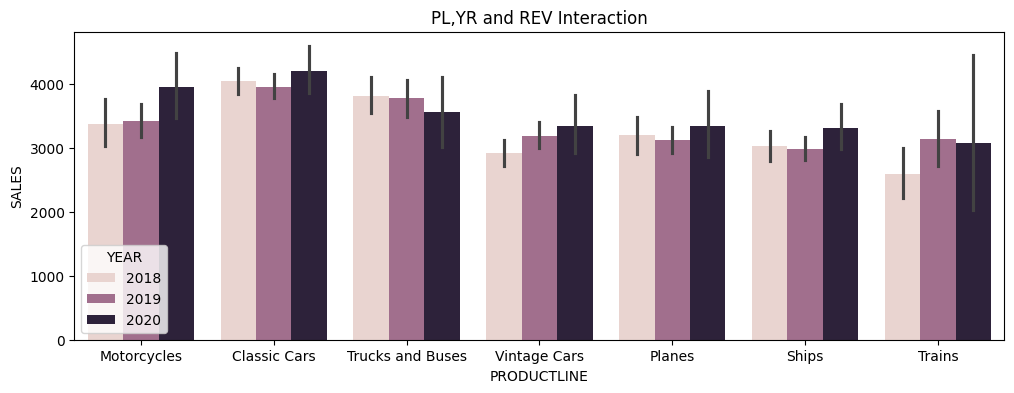

In [66]:
# Q11. How do productline,year, and revenue interact

plt.figure(figsize=(12,4))
sns.barplot(x='PRODUCTLINE',y='SALES',hue='YEAR', data=df)
plt.title('PL,YR and REV Interaction')
plt.show()

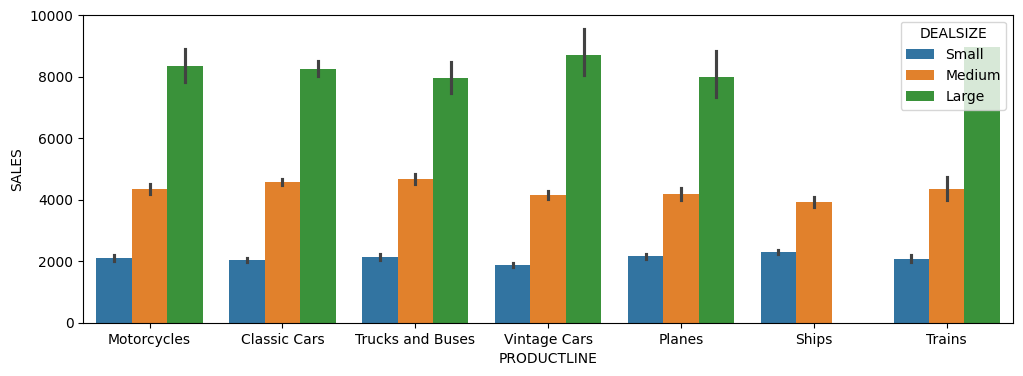

In [67]:
# Q12.How do deal sizes vary by revenue and productline
plt.figure(figsize=(12,4))
sns.barplot(x='PRODUCTLINE',y='SALES',hue='DEALSIZE',data=df )
plt.title('')
plt.show()